In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
df=pd.read_csv('Health_Insurance_Data.csv')
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [6]:
df['location'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# checking Null values

In [7]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

# Replacing Null Values

In [8]:
mean=df['age'].mean()
meadian1=df['BMI'].median()
meadian2=df['health_insurance_price'].median()

df['age'].replace(np.nan,mean,inplace=True)
df['BMI'].replace(np.nan,meadian1,inplace=True)
df['health_insurance_price'].replace(np.nan,meadian2,inplace=True)


# Cross-Checking Null values

In [9]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

# Check for duplicate data

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 1


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
581,19.0,male,30.59,0,no,northwest,1639.5631


# Drop Duplicates

In [11]:
df.drop_duplicates(inplace=True)

# Cross-Check for duplicate data

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,age,gender,BMI,Children,smoking_status,location,health_insurance_price


# Checking OutLiers

<AxesSubplot:>

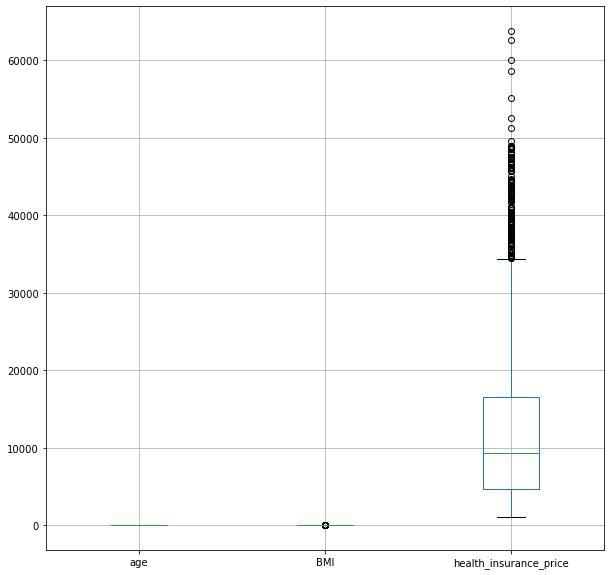

In [13]:
df.boxplot(column=['age','BMI','health_insurance_price'],figsize=(10,10))

# EDA

<AxesSubplot:xlabel='BMI', ylabel='Density'>

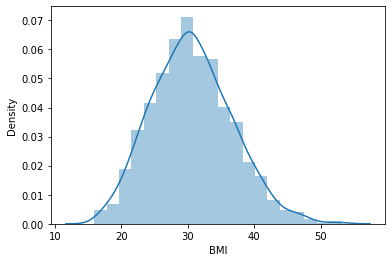

In [14]:
sns.distplot(df.BMI,bins=20)

<AxesSubplot:xlabel='health_insurance_price', ylabel='Density'>

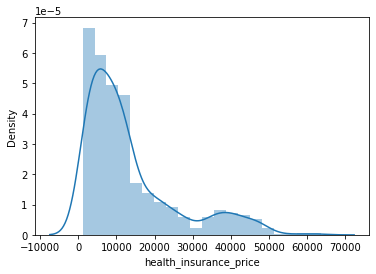

In [15]:
sns.distplot(df.health_insurance_price,bins=20)

# Removing Skewness-Transformation

In [16]:
df['log_health_insurance_price']=np.log(df['health_insurance_price'])
df['log_health_insurance_price'].skew()

-0.09012789127428952

<AxesSubplot:xlabel='log_health_insurance_price', ylabel='Density'>

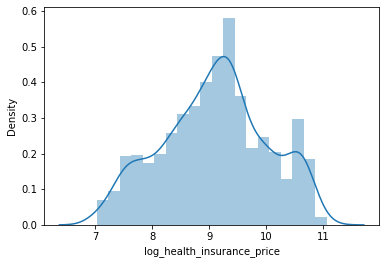

In [17]:
sns.distplot(df.log_health_insurance_price,bins=20)

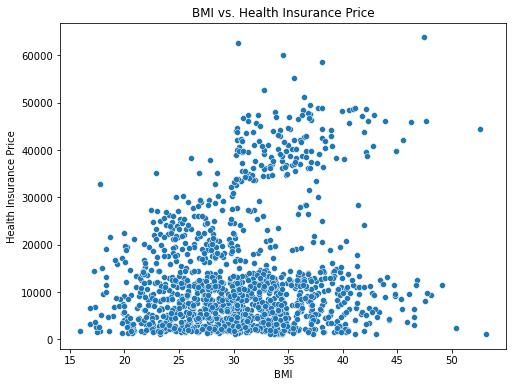

In [18]:
# Create a scatterplot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.scatterplot(x='BMI', y='health_insurance_price', data=df, marker='o')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Health Insurance Price')
plt.title('BMI vs. Health Insurance Price')

# Show the plot
plt.show()

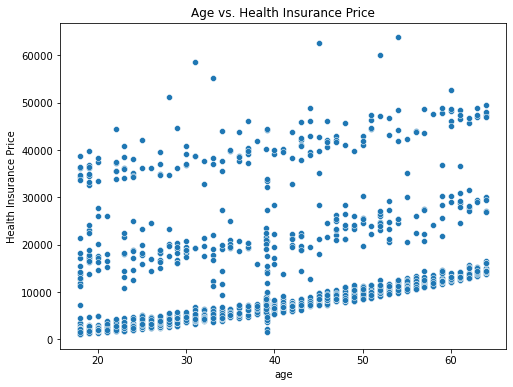

In [19]:
# Create a scatterplot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.scatterplot(x='age', y='health_insurance_price', data=df, marker='o')

# Add labels and title
plt.xlabel('age')
plt.ylabel('Health Insurance Price')
plt.title('Age vs. Health Insurance Price')

# Show the plot
plt.show()

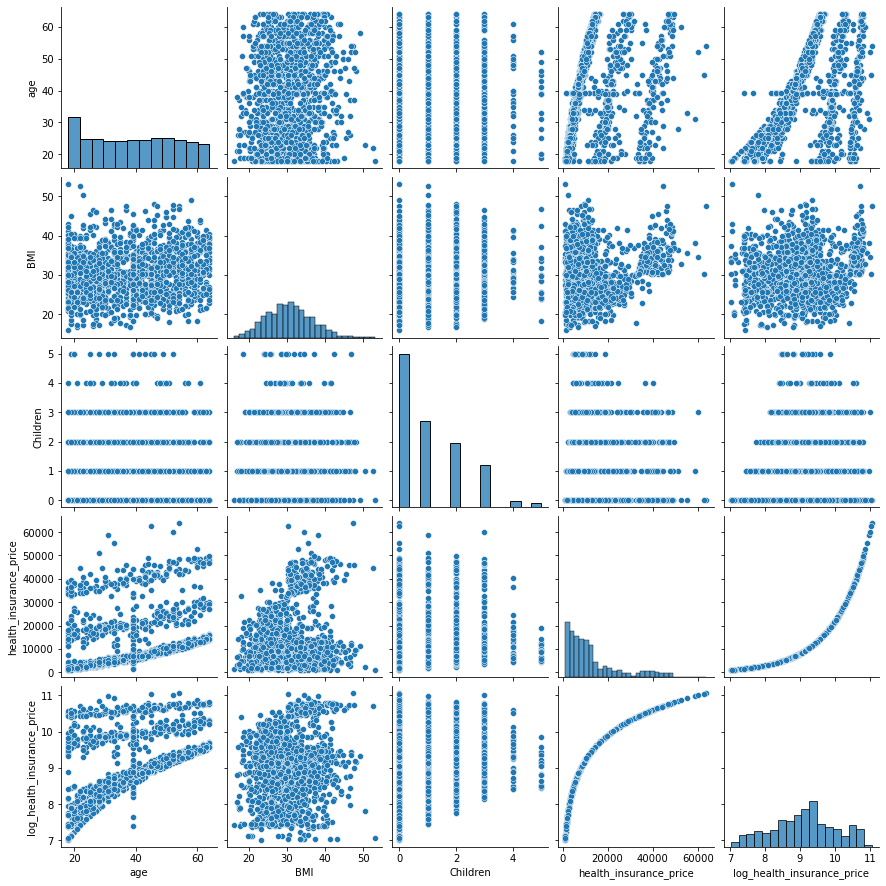

In [20]:
sns.pairplot(df)
plt.show()

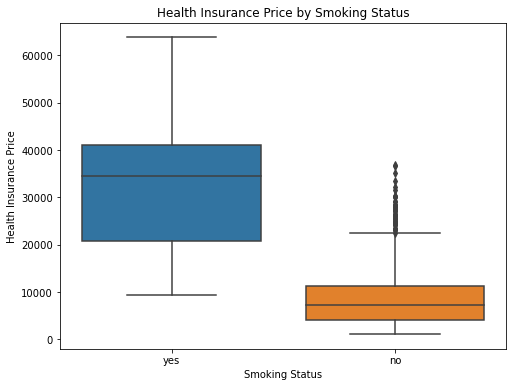

In [21]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.boxplot(x='smoking_status', y='health_insurance_price', data=df)

# Add labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Health Insurance Price')
plt.title('Health Insurance Price by Smoking Status')

# Show the plot
plt.show()

In [22]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,log_health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400,9.734176
1,18.0,male,33.770,1,no,southeast,1725.55230,7.453302
2,28.0,male,33.000,3,no,southeast,4449.46200,8.400538
3,33.0,male,22.705,0,no,northwest,21984.47061,9.998092
4,32.0,male,28.880,0,no,northwest,3866.85520,8.260197


In [23]:
df.drop(columns=['health_insurance_price'], inplace=True)

# One-hot encoding

In [24]:
df=pd.get_dummies(df,columns=['gender','smoking_status','location'],drop_first=True)
df

,age,BMI,Children,log_health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,30.305,0,9.734176,0,1,0,0,1
1,18.0,33.770,1,7.453302,1,0,0,1,0
2,28.0,33.000,3,8.400538,1,0,0,1,0
3,33.0,22.705,0,9.998092,1,0,1,0,0
4,32.0,28.880,0,8.260197,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3,9.268661,1,0,1,0,0
1334,18.0,31.920,0,7.698927,0,0,0,0,0
1335,18.0,36.850,0,7.396233,0,0,0,1,0
1336,21.0,25.800,0,7.604867,0,0,0,0,1


# Selecting Dependent(y) and Independent(X) Variables

In [25]:
X=df.drop('log_health_insurance_price',axis=1)
X

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,30.305,0,0,1,0,0,1
1,18.0,33.770,1,1,0,0,1,0
2,28.0,33.000,3,1,0,0,1,0
3,33.0,22.705,0,1,0,1,0,0
4,32.0,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3,1,0,1,0,0
1334,18.0,31.920,0,0,0,0,0,0
1335,18.0,36.850,0,0,0,0,1,0
1336,21.0,25.800,0,0,0,0,0,1


In [26]:
y=df['log_health_insurance_price']
y

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: log_health_insurance_price, Length: 1337, dtype: float64

# Splitting Data into Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
1114,23.000000,24.510,0,1,0,0,0,0
968,21.000000,25.745,2,1,0,0,0,0
599,39.166412,37.525,2,0,0,1,0,0
170,63.000000,41.470,0,1,0,0,1,0
275,47.000000,26.600,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1096,51.000000,34.960,2,0,1,0,0,0
1131,27.000000,45.900,2,1,0,0,0,1
1295,20.000000,22.000,1,1,0,0,0,1
861,38.000000,28.000,3,0,0,0,0,1


In [29]:
X_test

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
900,49.0,22.515,0,1,0,0,0,0
1064,29.0,25.600,4,0,0,0,0,1
1256,51.0,36.385,3,0,0,1,0,0
298,31.0,34.390,3,1,1,1,0,0
237,31.0,38.390,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...
534,64.0,40.480,0,1,0,0,1,0
542,63.0,36.300,0,0,0,0,1,0
760,22.0,34.580,2,0,0,0,0,0
1284,61.0,36.300,1,1,1,0,0,1


In [30]:
y_train

1114     7.781596
968      8.095559
599     10.418464
170      9.503412
275      9.181513
          ...    
1096    10.706412
1131     8.214310
1295     7.583136
861      8.875020
1127     8.671890
Name: log_health_insurance_price, Length: 1069, dtype: float64

In [31]:
y_test

900      9.069797
1064     8.649776
1256     9.344586
298     10.564792
237      8.403622
          ...    
534      9.534676
542      9.538723
760      8.275315
1284    10.766459
1285     9.051892
Name: log_health_insurance_price, Length: 268, dtype: float64

# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train.iloc[:,[0,1]]=sc.fit_transform(X_train.iloc[:,[0,1]])
X_test.iloc[:,[0,1]]=sc.transform(X_test.iloc[:,[0,1]])

In [33]:
X_train

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
1114,-1.166496,-1.000362,0,1,0,0,0,0
968,-1.310727,-0.794803,2,1,0,0,0,0
599,-0.000648,1.165921,2,0,0,1,0,0
170,1.718122,1.822546,0,1,0,0,1,0
275,0.564275,-0.652492,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1096,0.852737,0.738989,2,0,1,0,0,0
1131,-0.878034,2.559898,2,1,0,0,0,1
1295,-1.382842,-1.418139,1,1,0,0,0,1
861,-0.084764,-0.419469,3,0,0,0,0,1


In [34]:
X_test

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
900,0.708506,-1.332420,0,1,0,0,0,0
1064,-0.733803,-0.818937,4,0,0,0,0,1
1256,0.852737,0.976173,3,0,0,1,0,0
298,-0.589572,0.644115,3,1,1,1,0,0
237,-0.589572,1.309896,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...
534,1.790238,1.657766,0,1,0,0,1,0
542,1.718122,0.962025,0,0,0,0,1,0
760,-1.238611,0.675740,2,0,0,0,0,0
1284,1.573891,0.962025,1,1,1,0,0,1


# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
model=LinearRegression()

#creating linear regression model
model.fit(X_train,y_train)


# Predicting on train and test data
y_pred_train=model.predict(X_train)
y_pred_test =model.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)

Train r2 Score: 0.7379346071680994
Test r2 Score: 0.8222796886011724
mean_absolute_error: 0.2702171129226911
mean_squared_error: 0.1649564487847305
root_mean_squared_error: 0.40614830885371234


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Creating Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=5)

# Training the Random Forest Regressor model
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred_train=rf_model.predict(X_train)
y_pred_test =rf_model.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)

Train r2 Score: 0.8377654718684081
Test r2 Score: 0.8710185332494199
mean_absolute_error: 0.1901356563740138
mean_squared_error: 0.1197180251753815
root_mean_squared_error: 0.3460029265416429


# Hyper Parameter Tunning

In [37]:
from sklearn.model_selection import GridSearchCV

estimator=RandomForestRegressor(random_state=42)

param_grid={'n_estimators':list(range(1,101))}

grid=GridSearchCV(estimator,param_grid,cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 76}

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Creating Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=76, random_state=42,max_depth=5)

# Training the Random Forest Regressor model
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred_train=rf_model.predict(X_train)
y_pred_test =rf_model.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)

Train r2 Score: 0.8373678070112349
Test r2 Score: 0.8708848498948997
mean_absolute_error: 0.19029903908266918
mean_squared_error: 0.11984210739901549
root_mean_squared_error: 0.34618218815966756


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
regressor = DecisionTreeRegressor(random_state=42,max_depth=5)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predicting on test data
y_pred_train=regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)

Train r2 Score: 0.8272273073858761
Test r2 Score: 0.8607076299666104
mean_absolute_error: 0.20301899841053977
mean_squared_error: 0.12928839997333097
root_mean_squared_error: 0.35956696173777003


# Boosting

In [40]:
import xgboost as xgb

# Creating XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators = 13,random_state=42)
        
# Training the XGBoost Regressor model
xgb_model.fit(X_train, y_train)

# Predicting on test data
y_pred_train=xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)


Train r2 Score: 0.8604413028530589
Test r2 Score: 0.8650790345506206
mean_absolute_error: 0.19236686670662176
mean_squared_error: 0.12523094941686988
root_mean_squared_error: 0.3538798516684298


In [41]:
import joblib

# Assuming 'scaler' is your trained StandardScaler
scaler_filename = 'HI_price_prediction_model.pkl'

# Save the scaler to a file
joblib.dump(sc, scaler_filename)


['HI_price_prediction_model.pkl']

In [42]:
# Load the trained StandardScaler or any other scaler you used
scaler = joblib.load('HI_price_prediction_model.pkl')

# Prediction

In [43]:
new_data = {
    'age': 65,
    'gender_male': 0,  
    'children': 3,
    'location_northwest': 0,
    'location_southeast':1,
    'location_southwest':0,
    'BMI': 30,
    'smoking_status_yes':1  
}

new_data_df = pd.DataFrame([new_data])

# Apply the trained scaler to the new data
scaled_new_data = scaler.transform(new_data_df.iloc[:,[0,6]])

predicted_prices = rf_model.predict(new_data_df)
predicted_prices1=np.exp(predicted_prices)


print("Predicted Health Insurance Price:", predicted_prices1)


Predicted Health Insurance Price: [45709.33888225]
